# Supervised Learning
**Pipeline Approach**
> Sven Gehrke
> Feb 2022

## Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## prepare data

In [2]:
iris = load_iris()
iris['data'] = iris['data'][:, [1, 2]]

X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size=0.33,
                                                    random_state=666
                                                    )

## Prepare Pipeline
the names dont have to be named like here, but its conventional

**steps**
define the methods and their execution order

**param_grid**
define the parameter you want to test
__ indicate the parameter name 'knn__n_neighbors' -> for the knn step, use the n_neighbor parameter

**Pipeline(steps=steps)**
create and instance of *pipeline* with the defined *steps*

**GridsearchCV**
pass the *pipline* and the *param_grid* and perform a gridsearch with cross-validation!


In [3]:
steps = [
	('scaler', StandardScaler()),
	('knn', KNeighborsClassifier())
]

param_grid = {'knn__n_neighbors': np.arange(3, 25, 2),
              'knn__leaf_size': np.arange(2, 25, 2)}
pipe = Pipeline(steps=steps)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__leaf_size': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]),
                         'knn__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

## evaluate the found solution

In [4]:
grid.score(X_test, y_test)
print('Best parameters: {}'.format(grid.best_params_))
print('Best scores: {}'.format(grid.best_score_))

Best parameters: {'knn__leaf_size': 2, 'knn__n_neighbors': 17}
Best scores: 0.9099999999999999


## store the results

**pickle** stores all python objects and can be loaded later

In [5]:
pipe = grid.best_estimator_
# store the pipeline

pd.to_pickle(pipe,'pipeline.pickle')
pipe2=pd.read_pickle('pipeline.pickle')
print(pipe2)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=2, n_neighbors=17))])


## plot the results

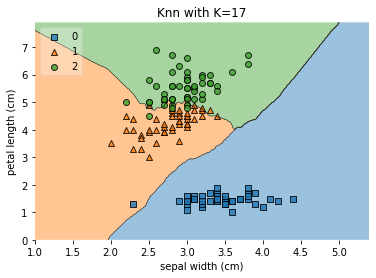

In [6]:
from mlxtend.plotting import plot_decision_regions
# Plotting decision region

import matplotlib.pyplot as plt

plot_decision_regions(iris['data'],
                      iris['target'],
                      # clf=pipe.named_steps['knn'],
                      clf=grid,
                      legend=2
                      )
#plt.figure(figsize=(12, 12), dpi=216)
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][2])
plt.title('Knn with K=' + str(grid.best_params_['knn__n_neighbors']))
plt.show()